<a href="https://colab.research.google.com/github/rafaelduarte82/Especializacao/blob/main/AKCIT_GenIA_M7_Colab_Unidade_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

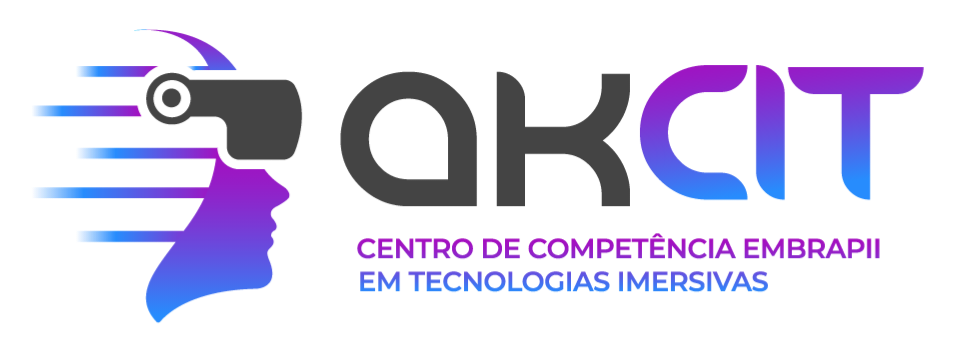

# Definição e Importância da Regressão em Análise de Dados e *Machine Learning*
A regressão é uma técnica estatística amplamente utilizada para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes. Em análise de dados e *machine learning*, a regressão é fundamental para previsões quantitativas, permitindo que analistas e cientistas de dados façam inferências e estimativas baseadas em padrões observados nos dados. A importância da regressão reside na sua aplicabilidade em diversos campos, desde economia e finanças, onde é usada para prever valores de mercado, até na indústria, onde pode otimizar processos e prever demandas.

## Distinção entre Problemas de Regressão e Classificação
Enquanto a regressão foca na predição de variáveis contínuas, como preços, temperaturas ou índices, a classificação é empregada para atribuir instâncias a categorias discretas. Por exemplo, determinar se um e-mail é spam ou não é um problema de classificação binária. Já prever a temperatura máxima para o próximo dia é um problema típico de regressão. A distinção entre esses dois tipos de problemas é crucial, pois os métodos e métricas de avaliação são distintos e a escolha do modelo adequado depende dessa compreensão.


# Métricas de Regressão: R², MSE, MAE e RMSE com Python

## Objetivos

- **Compreender as métricas de desempenho R², MSE, MAE e RMSE em modelos de regressão.**
- **Aprender a calcular e interpretar essas métricas utilizando Python.**
- **Implementar exemplos práticos de uso dessas métricas em modelos de regressão.**

## Introdução

Em modelos de regressão, é fundamental avaliar a performance do modelo para entender quão bem ele está se ajustando aos dados e para fazer previsões confiáveis. Existem diversas métricas para medir a qualidade de um modelo de regressão.

Para avaliar a performance de modelos de regressão, várias métricas são utilizadas:
- **$R^2$ (Coeficiente de Determinação):** Mede a proporção da variabilidade da variável dependente que é explicada pelas variáveis independentes no modelo.
- **MSE (Erro Quadrático Médio):** Média dos quadrados dos erros, fornece uma medida da variância dos erros.
- **MAE (Erro Absoluto Médio):** Média dos erros absolutos, sendo menos sensível a outliers que o MSE.
- **RMSE (Raiz do Erro Quadrático Médio):** Raiz quadrada do MSE, traz a medida de erro para a mesma escala da variável dependente.

## Exemplos Práticos
### Carregando Bibliotecas e Dados

Vamos criar um conjunto de dados fictício para ilustrar o cálculo do R². Suponhamos que estamos analisando a relação entre a quantidade de horas estudadas (variável independente) e a pontuação em um teste (variável dependente).

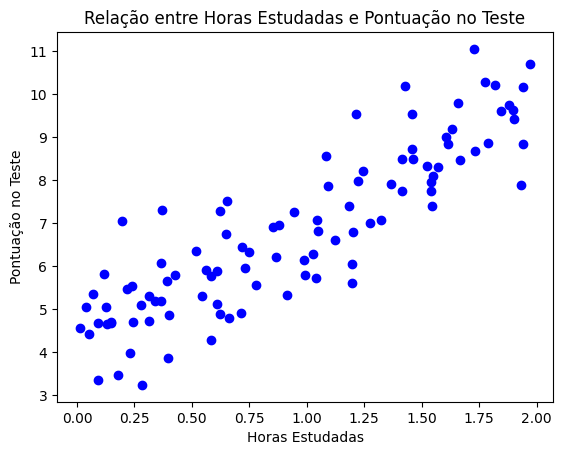

In [ ]:
# Importação das bibliotecas que serão utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Dependendo da versão do sklearn instalado pode ser que a linha abaixo apresente problemas
# Essa linha é para uma versão mais recente, porém no colab ela será comentada para evitar erros
# from sklearn.metrics import root_mean_squared_error

# Gerar dados fictícios
# o random.seed é necessário para manter a reprodutibilidade dos dados.
# ele gera sempre os mesmos números aleatórios
np.random.seed(42)
# Em X são gerados um vetor de 100 dados aleatórios com base no random.seed
X = 2 * np.random.rand(100, 1)
# Em y são gerados outro vetor com 100 dados aleatórios baseados em X e um ruído
y = 4 + 3 * X + np.random.randn(100, 1)

# Plotar os dados para facilitar a visualização
# gera um gráfico de pontos azuis com os valores reais dos pontos
plt.scatter(X, y, color='blue')
# Defini-se o título
plt.title('Relação entre Horas Estudadas e Pontuação no Teste')
# Defini-se o texto do eixo x
plt.xlabel('Horas Estudadas')
# Defini-se o texto do eixo y
plt.ylabel('Pontuação no Teste')
# Mostra a figura
plt.show()

### Treinando o Modelo de Regressão Linear

Vamos ajustar um modelo de regressão linear simples aos dados.

Para utilizar as métricas é necessário ter dados reais e preditos, para isso será usado um simples modelo de regressão linear, que fará a predição de valores de `y` com base nos valores de `X`.

Esses valores preditos serão guardados no `y_pred`.

Ao fim, é plotado em vermelho o resultado desse modelo de predição. Em pontos na cor azul estão ilustrados os dados reais.

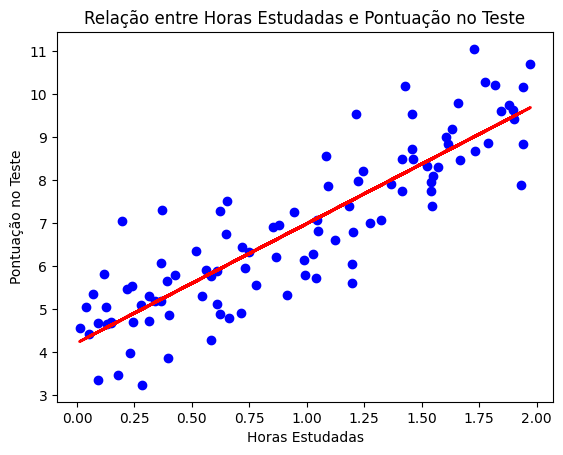

In [ ]:
# Ajustar o modelo de regressão linear
# Cria um modelo de regressão linear
model = LinearRegression()
# Treina o modelo com base nos valores de X e y
model.fit(X, y)
# Utilizando o modelo já treinado, faz a predição dos valores de X e guarda em y_pred
y_pred = model.predict(X)

# Plotar os dados e a linha de regressão
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.title('Relação entre Horas Estudadas e Pontuação no Teste')
plt.xlabel('Horas Estudadas')
plt.ylabel('Pontuação no Teste')
plt.show()

## Explicações Teóricas com Exemplos práticos
### R² (Coeficiente de Determinação)

- **Definição:** Mede a proporção da variância dos dados dependentes que é explicada pelo modelo de regressão.
- **Interpretação:** Varia de 0 a 1. Um valor de 1 indica que o modelo explica toda a variância dos dados, enquanto um valor de 0 indica que o modelo não explica nenhuma variância.
- **Função:** pode ser utilizado o pacote do sklearn `r2 = r2_score(y, y_pred)`

#### Explicação Detalhada do R²

O Coeficiente de Determinação R², é calculado como:

$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

onde:
- $ y_i $ são os valores reais,
- $ \hat{y}_i $ são os valores preditos pelo modelo,
- $ \bar{y} $ é a média dos valores reais,
- $ \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $ é a soma dos quadrados dos resíduos (SSR),
- $ \sum_{i=1}^{n} (y_i - \bar{y})^2 $ é a soma total dos quadrados (SST).

O valor de R² varia entre 0 e 1:
- $ R^2 = 0 $ indica que o modelo não explica nenhuma variação nos dados.
- $ R^2 = 1 $ indica que o modelo explica toda a variação nos dados.

Abaixo serão apresentados duas maneiras de cálculo do $R^2$, uma manualmente utilizando a formulação matemática acima e outra mais direta, utilizando o pacote do sklearn.

Como é de se esperar, em ambos casos os valores encontrados são os mesmos.

In [ ]:
# Calculando manualmente
# Média dos valores reais
y_mean = np.array([np.mean(y)])

# Calcular os componentes da fórmula do R²
ssr = np.sum((y - y_pred) ** 2)
sst = np.sum((y - y_mean) ** 2)

# Cálculo do R² utilizando a fórmula
r2_manual = 1 - (ssr/sst)

# Impressão do resultado
print(f"Coefficient of Determination (R²): {r2_manual:.2f}")

Coefficient of Determination (R²): 0.77


In [ ]:
# Calcular o R²
# Passa-se os valores reais (y), os valores obtidos do modelo (y_pred)
# o valor do erro é guardado em r2
r2 = r2_score(y, y_pred)
print(f'Coefficient of Determination (R²): {r2:.2f}')

Coefficient of Determination (R²): 0.77


#### Visualização da Variabilidade Explicada
Este código permite visualizar graficamente como um modelo de regressão se ajusta aos dados e qual a proporção da variabilidade dos dados que o modelo consegue explicar. Apresentam-se a variabilidade não explicada pelo modelo (SSR) e a variabilidade Total (SST). Esses conceitos ajudam a entender melhor a fórmula do $R^2$.

**Variabilidade Não Explicada (SSR)**: As linhas pontilhadas laranja representam os erros do modelo, ou seja, a diferença entre o valor real (ponto em azul) e sua projeção ao modelo (linha vermelha). Quanto menores forem essas linhas, melhor o modelo se ajusta aos dados.

**Variabilidade Total (SST)**: A linha horizontal verde representa a média dos dados. A distância entre os pontos e a linha representa a variabilidade total dos dados.


O primeiro gráfico mostra a variabilidade que o modelo não consegue explicar. Quanto menor a distância entre os pontos e a linha de regressão, melhor o modelo se ajusta aos dados. O segundo gráfico mostra a variabilidade total dos dados. Comparando os dois gráficos, podemos ter uma ideia de quanto da variabilidade total está sendo explicada pelo modelo.

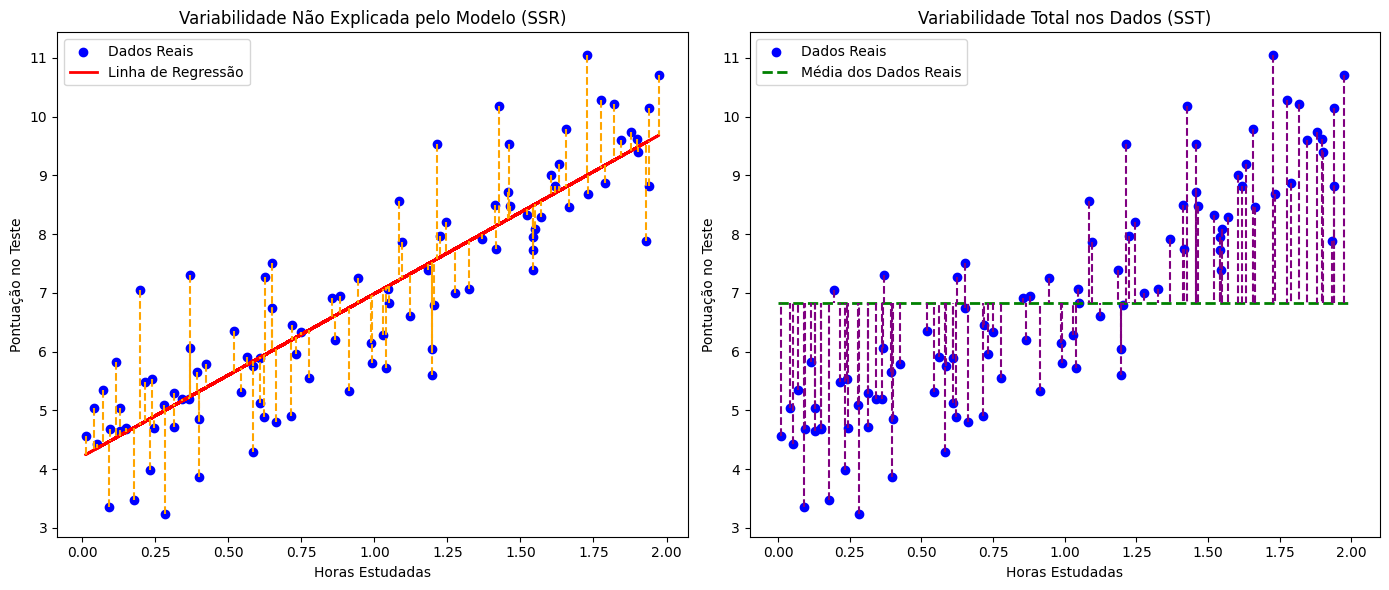

In [ ]:
# Criar as subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotar a variabilidade não explicada (SSR)
axs[0].scatter(X, y, color='blue', label='Dados Reais')
axs[0].plot(X, y_pred, color='red', linewidth=2, label='Linha de Regressão')
for i in range(len(X)):
    axs[0].plot([X[i], X[i]], [y[i], y_pred[i]], color='orange', linestyle='dashed')
axs[0].set_title('Variabilidade Não Explicada pelo Modelo (SSR)')
axs[0].set_xlabel('Horas Estudadas')
axs[0].set_ylabel('Pontuação no Teste')
axs[0].legend()

# Plotar a variabilidade total (SST)
axs[1].scatter(X, y, color='blue', label='Dados Reais')
axs[1].hlines(y=y_mean, xmin=0, xmax=2, color='green', linestyle='dashed', linewidth=2, label='Média dos Dados Reais')
for i in range(len(X)):
    axs[1].plot([X[i], X[i]], [y[i], y_mean], color='purple', linestyle='dashed')
axs[1].set_title('Variabilidade Total nos Dados (SST)')
axs[1].set_xlabel('Horas Estudadas')
axs[1].set_ylabel('Pontuação no Teste')
axs[1].legend()

# Mostrar os gráficos
plt.tight_layout()
plt.show()

### MSE (Mean Squared Error)

- **Definição:** É a média dos quadrados dos erros entre os valores previstos e os valores reais.
- **Interpretação:** Quanto menor o MSE, melhor o modelo. Penaliza mais os erros grandes do que os erros pequenos.
- **Função:**  pode ser utilizado o pacote do sklearn `mse = mean_squared_error(y, y_pred)`

#### Explicação Detalhada do MSE

O Mean Squared Error (MSE) é uma métrica utilizada para avaliar a performance de um modelo de regressão. Ele calcula a média dos quadrados das diferenças entre os valores observados (reais) e os valores preditos pelo modelo. A fórmula do MSE é:

$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

onde:
- $ y_i $ são os valores reais,
- $ \hat{y}_i $ são os valores preditos pelo modelo,
- $ n $ é o número de observações.

O MSE penaliza erros grandes mais severamente do que erros pequenos devido ao uso do quadrado das diferenças. Um MSE menor indica um modelo com melhor performance, enquanto um MSE maior indica um modelo com pior performance.

Abaixo serão apresentados duas maneiras de cálculo do MSE, uma manualmente utilizando a formulação matemática acima e outra mais direta, utilizando o pacote do sklearn.

Como é de se esperar, em ambos casos os valores encontrados são os mesmos.

In [ ]:
# Calculando manualmente

# Calcular a soma dos quadrados dos resíduos (SSR)
ssr = np.sum((y - y_pred) ** 2)
# Médias dos valores
mse_manual = ssr/len(y)

print(f"Mean Squared Error (MSE): {mse_manual:.2f}")

Mean Squared Error (MSE): 0.81


In [ ]:
# Calcular o MSE
# Passa-se os valores reais (y), os valores obtidos do modelo (y_pred)
# o valor do erro é guardado em mse
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

Mean Squared Error (MSE): 0.81


#### Visualização dos Resíduos ao quadrado e MSE
Para ilustrar melhor, podemos plotar os resíduos ao quadrado e o MSE obtido pelo modelo.

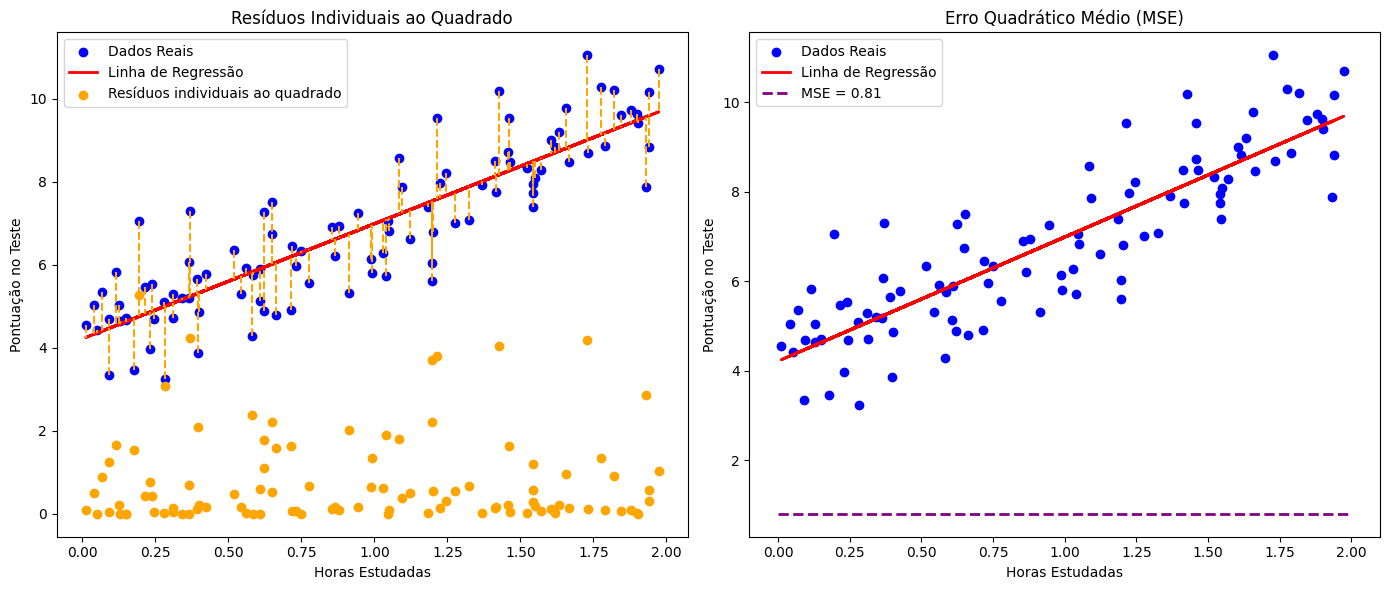

In [ ]:
# Criar as subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotar os resíduos individuais ao quadrado
axs[0].scatter(X, y, color='blue', label='Dados Reais')
axs[0].plot(X, y_pred, color='red', linewidth=2, label='Linha de Regressão')
for i in range(len(X)):
    axs[0].plot([X[i], X[i]], [y[i], y_pred[i]], color='orange', linestyle='dashed')
axs[0].scatter(X, (y - y_pred)**2, color='orange', label='Resíduos individuais ao quadrado')
axs[0].set_title('Resíduos Individuais ao Quadrado')
axs[0].set_xlabel('Horas Estudadas')
axs[0].set_ylabel('Pontuação no Teste')
axs[0].legend()

# Plotar o MSE
axs[1].scatter(X, y, color='blue', label='Dados Reais')
axs[1].plot(X, y_pred, color='red', linewidth=2, label='Linha de Regressão')
axs[1].hlines(y=mse, xmin=0, xmax=2, color='purple', linestyle='dashed', linewidth=2, label=f'MSE = {mse:.2f}')
axs[1].set_title('Erro Quadrático Médio (MSE)')
axs[1].set_xlabel('Horas Estudadas')
axs[1].set_ylabel('Pontuação no Teste')
axs[1].legend()

# Mostrar os gráficos
plt.tight_layout()
plt.show()

#### Explicação dos Gráficos

1. **Primeiro Gráfico (Resíduos ao Quadrado)**:
    - Os pontos azuis representam os dados reais.
    - A linha vermelha representa a linha de regressão ajustada pelo modelo.
    - As linhas tracejadas laranja e os pontos laranja representam os **erros individuais ao quadrado**, mostrando as diferenças entre os valores observados e preditos.
2. **Segundo Gráfico (MSE)**:
    - Os pontos azuis representam os dados reais.
    - A linha vermelha representa a linha de regressão ajustada pelo modelo.
    - A linha tracejada roxa horizontal representa plota o Erro Quadrático Médio (MSE), que é a média dos resíduos ao quadrado.

### Mean Absolute Error (MAE)

- **Definição:** É a média dos valores absolutos dos erros entre os valores previstos e os valores reais.
- **Interpretação:** Quanto menor o MAE, melhor o modelo. Penaliza de forma linear todos os erros.
- **Função:**  pode ser utilizado o pacote do sklearn `mae = mean_absolute_error(y, y_pred)`

O MAE mede a magnitude média dos erros em um conjunto de previsões, sem considerar sua direção. É uma métrica linear, o que significa que todos os erros são ponderados igualmente.

#### Explicação Detalhada do MAE

O Mean Absolute Error (MAE) é definido como:

$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $

onde:
- $ y_i $ são os valores reais,
- $ \hat{y}_i $ são os valores preditos pelo modelo,
- $ n $ é o número de observações.

Abaixo serão apresentados duas maneiras de cálculo do MAE, uma manualmente utilizando a formulação matemática acima e outra mais direta, utilizando o pacote do sklearn.

Como é de se esperar, em ambos casos os valores encontrados são os mesmos.

In [ ]:
# Cálculo manual do MAE
err_abs = abs(y - y_pred)
# Somam-se os erros
sum_erros = np.sum(err_abs)
# Calcula o MAE
mae_manual = sum_erros/len(y)
# Impressão do resultado obtido
print(f'Mean Absolute Error (MAE): {mae_manual:.2f}')

Mean Absolute Error (MAE): 0.70


In [ ]:
# Calcular o MAE com o uso do sklearn
# Passa-se os valores reais (y), os valores obtidos do modelo (y_pred)
# o valor do erro é guardado em mae
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Absolute Error (MAE): 0.70


#### Visualização dos Erros Absolutos e do MAE
Para ilustrar melhor, podemos plotar os resíduos absolutos e o MAE obtido pelo modelo.

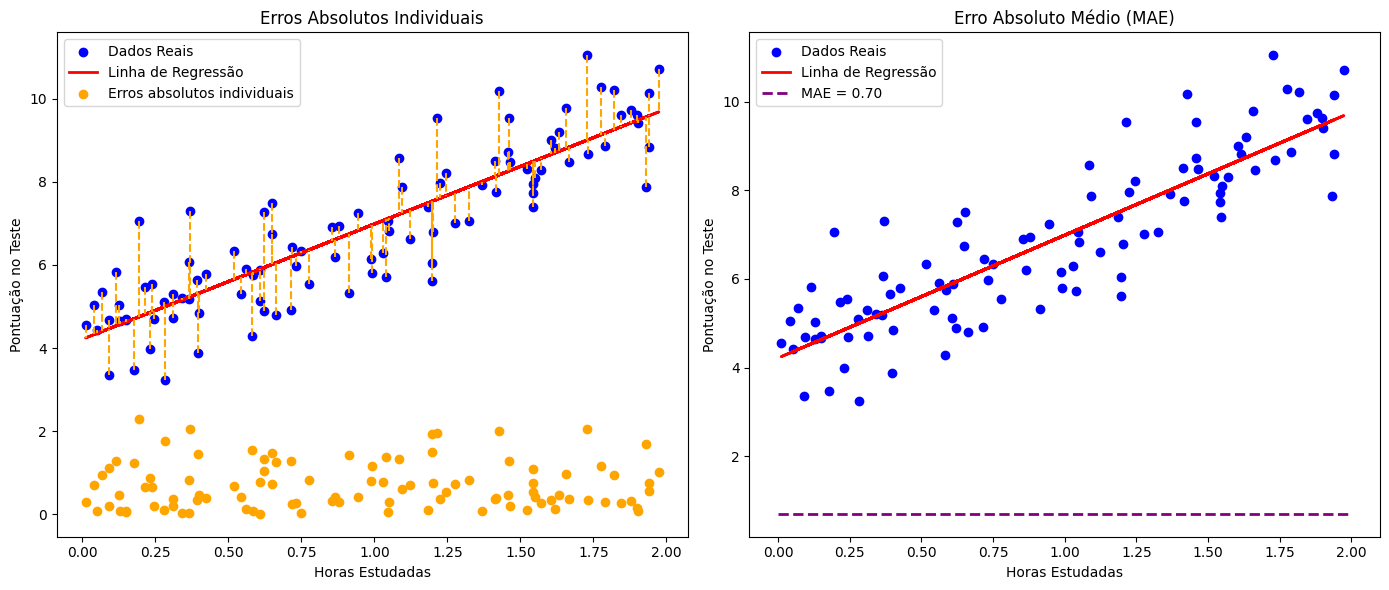

In [ ]:
# Criar as subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotar os erros absolutos individuais
axs[0].scatter(X, y, color='blue', label='Dados Reais')
axs[0].plot(X, y_pred, color='red', linewidth=2, label='Linha de Regressão')
for i in range(len(X)):
    axs[0].plot([X[i], X[i]], [y[i], y_pred[i]], color='orange', linestyle='dashed')
axs[0].scatter(X, abs(y - y_pred), color='orange', label='Erros absolutos individuais')
axs[0].set_title('Erros Absolutos Individuais')
axs[0].set_xlabel('Horas Estudadas')
axs[0].set_ylabel('Pontuação no Teste')
axs[0].legend()

# Plotar o MAE
axs[1].scatter(X, y, color='blue', label='Dados Reais')
axs[1].plot(X, y_pred, color='red', linewidth=2, label='Linha de Regressão')
axs[1].hlines(y=mae, xmin=0, xmax=2, color='purple', linestyle='dashed', linewidth=2, label=f'MAE = {mae:.2f}')
axs[1].set_title('Erro Absoluto Médio (MAE)')
axs[1].set_xlabel('Horas Estudadas')
axs[1].set_ylabel('Pontuação no Teste')
axs[1].legend()

# Mostrar os gráficos
plt.tight_layout()
plt.show()

#### Explicação dos Gráficos

1. **Primeiro Gráfico (Erros Absolutos Individuais)**:
    - Os pontos azuis representam os dados reais.
    - A linha vermelha representa a linha de regressão ajustada pelo modelo.
    - As linhas tracejadas laranja e os pontos laranja representam os **erros absolutos individuais**, ou seja, as diferenças absolutas entre os valores observados e os valores preditos.
2. **Segundo Gráfico (MAE)**:
    - Os pontos azuis representam os dados reais.
    - A linha vermelha representa a linha de regressão ajustada pelo modelo.
    - A linha tracejada roxa horizontal representa o valor do MAE, que é a média dos erros absolutos.

#### Para pensar:

**Pergunta**: Se o MAE utiliza os erros absolutos e o MSE os mesmos erros porém ao quadrado, por que o valor do MAE foi superior ao do MSE? \

**Resposta:**
Compare os pontos em laranja dos dois gráficos (MAE e MSE), note como ao elevar o quadrado (gráfico MSE), erros grandes ficam muito maiores ($10^2=100$), e erros pequenos ficam muito menores ($0.1^2=0.01$). Isso causa essa diferença nos valores.

### RMSE (Root Mean Squared Error)

- **Definição:** É a raiz quadrada da média dos quadrados dos erros.
- **Interpretação:** Quanto menor o RMSE, melhor o modelo. Tem a mesma unidade dos dados originais e penaliza mais os erros grandes.

#### Explicação Detalhada do RMSE

O Root Mean Squared Error (RMSE) é definido como:

$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $

onde:
- $ y_i $ são os valores reais,
- $ \hat{y}_i $ são os valores preditos pelo modelo,
- $ n $ é o número de observações.

O RMSE penaliza mais severamente grandes erros devido ao uso do quadrado das diferenças, similar ao MSE, mas retorna os erros na mesma unidade dos valores observados.

Abaixo serão apresentados duas maneiras de cálculo do MSE, uma manualmente utilizando a formulação matemática acima e outra mais direta, utilizando o pacote do sklearn.

Como é de se esperar, em ambos casos os valores encontrados são os mesmos.

In [ ]:
# Calcular o RMSE manualmente

# Calcular a soma dos quadrados dos resíduos (SSR)
ssr = np.sum((y - y_pred) ** 2)
# Médias dos valores
mse_manual = ssr/len(y)
# A raiz quadrada da média
rmse_manual = np.sqrt(mse_manual)

print(f'Root Mean Squared Error (RMSE): {rmse_manual:.2f}')

Root Mean Squared Error (RMSE): 0.90


In [ ]:
# Cálculo utilizando o pacote do sklearn
# Passa-se os valores reais (y), os valores obtidos do modelo (y_pred)
# nesse caso o parametro `squared` é necessário para que seja calculado a raiz quadrada do erro
# o valor do erro é guardado em rmse
rmse = mean_squared_error(y, y_pred, squared=False)

# Impressão dos resultados obtidos
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Root Mean Squared Error (RMSE): 0.90


####  Visualização dos Quadrado dos Resíduos e do RMSE
Para ilustrar melhor, podemos plotar o quadrado dos resíduos e o RMSE obtido pelo modelo.

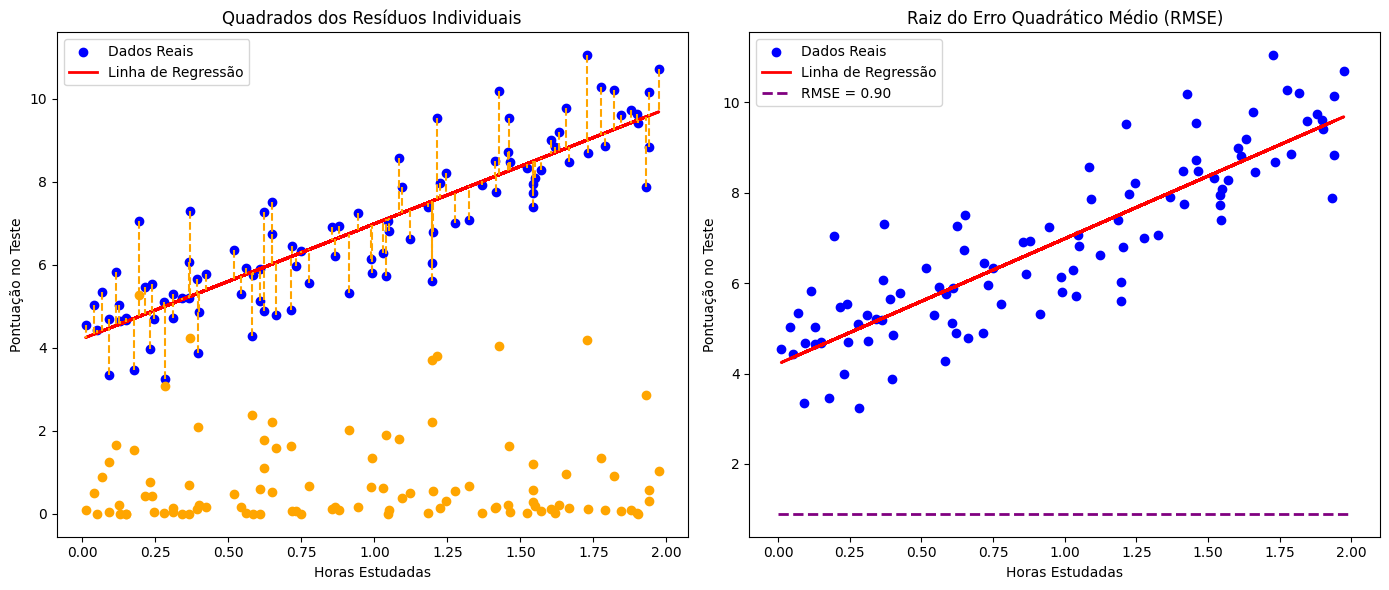

In [ ]:
# Criar as subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotar os resíduos ao quadrado individuais
axs[0].scatter(X, y, color='blue', label='Dados Reais')
axs[0].plot(X, y_pred, color='red', linewidth=2, label='Linha de Regressão')
for i in range(len(X)):
    axs[0].plot([X[i], X[i]], [y[i], y_pred[i]], color='orange', linestyle='dashed')
    axs[0].scatter(X[i], (y[i] - y_pred[i])**2, color='orange')
axs[0].set_title('Quadrados dos Resíduos Individuais')
axs[0].set_xlabel('Horas Estudadas')
axs[0].set_ylabel('Pontuação no Teste')
axs[0].legend()

# Plotar o RMSE
axs[1].scatter(X, y, color='blue', label='Dados Reais')
axs[1].plot(X, y_pred, color='red', linewidth=2, label='Linha de Regressão')
axs[1].hlines(y=rmse, xmin=0, xmax=2, color='purple', linestyle='dashed', linewidth=2, label=f'RMSE = {rmse:.2f}')
axs[1].set_title('Raiz do Erro Quadrático Médio (RMSE)')
axs[1].set_xlabel('Horas Estudadas')
axs[1].set_ylabel('Pontuação no Teste')
axs[1].legend()

# Mostrar os gráficos
plt.tight_layout()
plt.show()

#### Explicação dos Gráficos

1. **Primeiro Gráfico (Quadrados dos Resíduos Individuais)**:
    - Os pontos azuis representam os dados reais.
    - A linha vermelha representa a linha de regressão ajustada pelo modelo.
    - As linhas tracejadas laranja e os pontos laranja representam os quadrados dos resíduos individuais, ou seja, as diferenças ao quadrado entre os valores observados e os valores preditos.

2. **Segundo Gráfico (RMSE)**:
    - Os pontos azuis representam os dados reais.
    - A linha vermelha representa a linha de regressão ajustada pelo modelo.
    - A linha tracejada roxa horizontal representa o valor do RMSE, que é a raiz quadrada da média dos resíduos ao quadrado.

#### Para pensar:

**Pergunta**: Se o MSE calcula a média dos erros ao quadrado e o RMSE a raiz quadrada dessa média dos erros ao quadrado, por que o valor do RMSE foi superior ao do MSE?

**Resposta**: O valor de $\sqrt{0.81}$ (valor encontrado do MSE) é 0.90, a raiz quadrada de um numero menor que 1 sempre vai ser um valor maior que o próprio valor.

**Pergunta**: O valor do RMSE sempre vai ser maior que o do MSE?

**Resposta**: Não, porque o valor do MSE não está limitado apenas a valores menores que 1. Se o MSE encontrado for de 4, seu RMSE será $\sqrt{4}=2$.

#### Para pensar:

Se possuo dois conjuntos de dados diferentes, sobre assuntos diferentes, por exemplo:
1. diferença de velocidade entre atletas de uma maratona
2. diferença de velocidade entre atletas de uma corrida de automóveis

Ao utilizar um modelo de regressão é possível estimar os valores preditos.

**Pergunta**: É possível comparar os erros e afirmar que o mesmo modelo é bom para predição em ambas atividades?

**Resposta**: Não, como os dados são de magnitudes diferentes, ou seja velocidade de atletas da ordem de dezenas de km/h e velocidade entre corridas de automóveis da ordem de centenas de km/h, os erros podem possuir escalas diferentes. Porém, se os erros estiverem na mesma escala, é possível fazer a comparação.

**Pergunta**: Uma diferença de 10% entre a velocidade real e predita em ambos *datasets*, resultariam sempre em erros equivalentes?

**Resposta**: Não necessariamente, o código abaixo ilustra melhor. Dependendo da métrica o fator escala pode fazer grande diferença.


In [ ]:
# Conjunto de dados de uma maratona
y_foot = np.array([10.5, 12.1, 15.3, 17.2, 18.5, 23.2])
y_foot_pred = y_foot * 1.1

# Conjunto de dados de uma corrida de automóveis
y_car = np.array([150.4, 220.2, 157.8, 149.9, 153.0])
y_car_pred = y_car * 1.1

# Cálculo do R2 para ambos datasets
r2_foot =  r2_score(y_foot, y_foot_pred)
r2_car =   r2_score(y_car, y_car_pred)
print(f'R2 foot: {r2_foot:.2f}')
print(f'R2 car: {r2_car:.2f}')
print('**********************')

# Cálculo do MAE para ambos datasets
mae_foot = mean_absolute_error(y_foot, y_foot_pred)
mae_car  = mean_absolute_error(y_car, y_car_pred)
print(f'MAE foot: {mae_foot:.2f}')
print(f'MAE car: {mae_car:.2f}')
print('**********************')

# Cálculo do MSE para ambos datasets
mse_foot = mean_squared_error(y_foot, y_foot_pred)
mse_car  = mean_squared_error(y_car, y_car_pred)
print(f'MSE foot: {mse_foot:.2f}')
print(f'MSE car: {mse_car:.2f}')
print('**********************')

# Cálculo do RMSE para ambos datasets
rmse_foot = mean_squared_error(y_foot, y_foot_pred, squared=False)
rmse_car  = mean_squared_error(y_car, y_car_pred, squared=False)
print(f'RMSE foot: {rmse_foot:.2f}')
print(f'RMSE car: {rmse_car:.2f}')
print('**********************')

R2 foot: 0.84
R2 car: 0.61
**********************
MAE foot: 1.61
MAE car: 16.63
**********************
MSE foot: 2.78
MSE car: 283.78
**********************
RMSE foot: 1.67
RMSE car: 16.85
**********************


### Exercícios
Com base nos dados gerados anteriormente:

1. Plote em um gráfico com os pontos de velocidade real e velocidade predita para cada dataset (maratona, corrida de veículos)
2. Plote em um gráfico de barras os valores comparativos das metricas entre os datasets

#### Exercício resolvido 1: Plote em um gráfico com os pontos de velocidade real e velocidade predita para cada dataset (maratona, corrida de veículos)

In [ ]:
# Criação de um DataFrame com os valores das métricas para o caso da maratona
df_maratona = pd.DataFrame({'y': y_foot,
                            'y_pred': y_foot_pred
                           })
df_maratona

,y,y_pred
0,10.5,11.55
1,12.1,13.31
2,15.3,16.83
3,17.2,18.92
4,18.5,20.35
5,23.2,25.52


In [ ]:
# Criação de um DataFrame com os valroes das métricas para o caso da corrida de automóveis
df_carros = pd.DataFrame({'y': y_car,
                          'y_pred': y_car_pred
                         })
df_carros

,y,y_pred
0,150.4,165.44
1,220.2,242.22
2,157.8,173.58
3,149.9,164.89
4,153.0,168.30


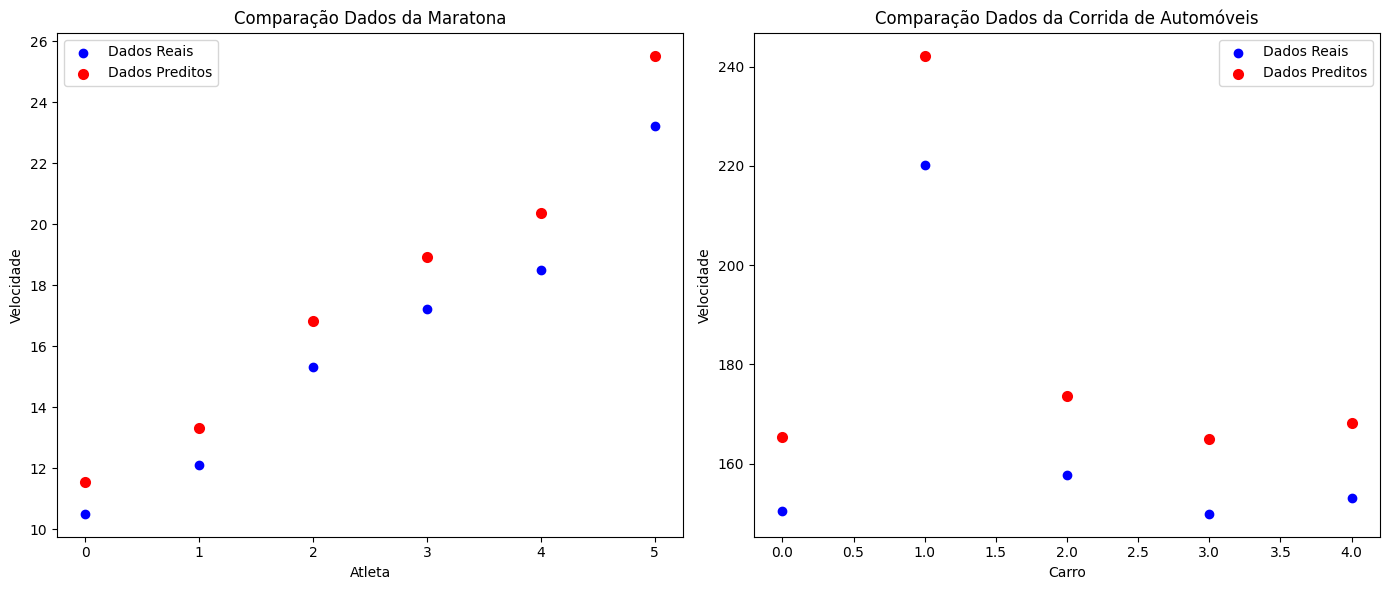

In [ ]:
# Criar as subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotar os resíduos ao quadrado individuais
axs[0].scatter(df_maratona.index, df_maratona['y'], color='blue', label='Dados Reais')
axs[0].scatter(df_maratona.index, df_maratona['y_pred'], color='red', linewidth=2, label='Dados Preditos')
axs[0].set_xlabel('Atleta')
axs[0].set_ylabel('Velocidade')
axs[0].set_title('Comparação Dados da Maratona')
axs[0].legend()

# Plotar os resíduos ao quadrado individuais
axs[1].scatter(df_carros.index, df_carros['y'], color='blue', label='Dados Reais')
axs[1].scatter(df_carros.index, df_carros['y_pred'], color='red', linewidth=2, label='Dados Preditos')
axs[1].set_xlabel('Carro')
axs[1].set_ylabel('Velocidade')
axs[1].set_title('Comparação Dados da Corrida de Automóveis')
axs[1].legend()

# Mostrar os gráficos
plt.tight_layout()
plt.show()

#### Exercício resolvido 2: Plote em um gráfico de barras os valores comparativos das metricas entre os datasets

In [ ]:
# Criação de um DataFrame com os valroes das métricas
df_metrics = pd.DataFrame({'$R^2$': [r2_foot, r2_car],
                           'MAE': [mae_foot, mae_car],
                           'MSE': [mse_foot, mse_car],
                           'RMSE': [rmse_foot, rmse_car],
                          },
                          index=['maratona', 'corrida_de_automóveis'],
                         )
df_metrics

,$R^2$,MAE,MSE,RMSE
maratona,0.841793,1.613333,2.778467,1.666873
corrida_de_automóveis,0.614027,16.626000,283.776100,16.845655


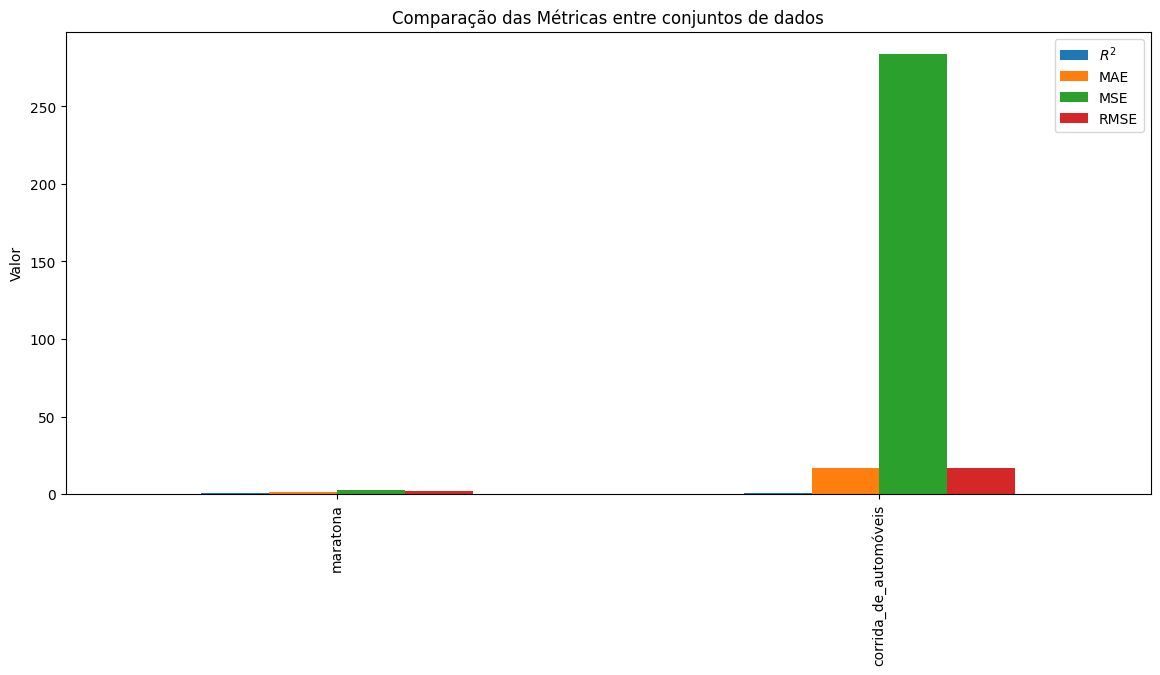

In [ ]:
df_metrics.plot(kind='bar', figsize=(14, 6))
plt.title('Comparação das Métricas entre conjuntos de dados')
plt.ylabel('Valor')
plt.show()

# Tipos de Regressão

Existem vários tipos de modelos de regressão, cada um com suas características e aplicações específicas:
- **Regressão Linear:** Simples e múltipla, modela a relação linear entre variáveis. É o ponto de partida para muitos estudos de regressão.
- **Regressão Ridge, Lasso e Elastic Net:** Incorporam penalizações para lidar com multicolinearidade e reduzir a complexidade do modelo, prevenindo sobreajuste.
- **Árvores de Regressão:** As árvores de regressão são uma técnica de aprendizado de máquina que utiliza uma estrutura em forma de árvore para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.
- **RNN (Recurrent Neural Network) ou Rede Neural Recorrente:** é um tipo de arquitetura de rede neural projetada para processar sequências de dados. Suas principais características são: a existência de loops internos que permitem que informações persistam; sua capacidade de lidar com entradas e saídas de comprimento variável; o compartilhamento de parâmetros ao longo do tempo, reduzindo o número total de parâmetros a serem aprendidos. Especialmente útil para tarefas que envolvem dados sequenciais, como processamento de linguagem natural, reconhecimento de fala e previsão de séries temporais.

## Objetivos

- **Compreender os fundamentos da regressão linear**
- **Aprender a implementar e avaliar esses modelos utilizando Python.**
- **Aplicar esses modelos em problemas de regressão com conjuntos de dados reais.**

## Introdução

A análise de regressão é uma técnica estatística fundamental utilizada para modelar a relação entre uma variável dependente e uma ou mais variáveis independentes. Este notebook abordará a Regressão Linear, porém cada método tem suas próprias características e aplicações específicas, que serão discutidas e implementadas em Python.

## Regressão Linear

- **Definição:** A regressão linear é um método estatístico para modelar a relação entre uma variável dependente e uma ou mais variáveis independentes assumindo uma relação linear.
- **Fórmula:** $ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $
- **Interpretação:** Utilizada quando se espera que a variável dependente varie linearmente com as variáveis independentes.

### Explicação Detalhada da Regressão Linear

A regressão linear simples assume a seguinte fórmula:

$ y = \beta_0 + \beta_1 X + \epsilon $

onde:
- $ y $ é a variável dependente.
- $ X $ é a variável independente.
- $ \beta_0 $ é o intercepto (valor de $ y $ quando $ X = 0 $).
- $ \beta_1 $ é o coeficiente de inclinação (quanto $ y $ muda com uma unidade de mudança em $ X $).
- $ \epsilon $ é o termo de erro (a diferença entre os valores observados e os valores preditos).

#### Passo 1: Carregando Biblioteca e dados

Vamos gerar alguns dados para exemplificar o processo de regressão linear.

Nesse exemplo é proposta a criação de um modelo linear para ser possível predizer qual seria o valor esperado de produção de uma máquina conforme fosse o ajuste de sua velocidade de produção.
- Em $X$ temos a velocidade de produção de uma máquina
- Em $y$ temos a quantidade de produtos produzidos

A máquina real possui uma série de variáveis que a influenciam, por isso só observar só 2 pontos e concluir algo é muito perigoso.

Os dados gerados nesse exemplo são aleatórios, com o uso do `random.seed` e seguem a mesma técnica utilizada ao longo desse notebook.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Gerar dados aleatórios
np.random.seed(42)
X = 2 * np.random.rand(10, 1)
# Ordena os dados de X
X = sorted(X)
# Adequa o formato
X = np.array([arr.tolist() for arr in X])

# Cria os valores de y observados
y = 4 + 3 * X + np.random.randn(10, 1)

#### Passo 2: Plotagem dos dados

Plotar os dados em um gráfico ajuda a entender todo o processo. É possível ver no gráfico, que quanto maior a velocidade de produção, maior a produção. Mas, com base no que se tem até agora, só é possível saber a produção para o conjunto testado. \
O modelo de regressão visa resolver a questão: Qual seria o valor esperado de produção para um tempo que ainda não testei?

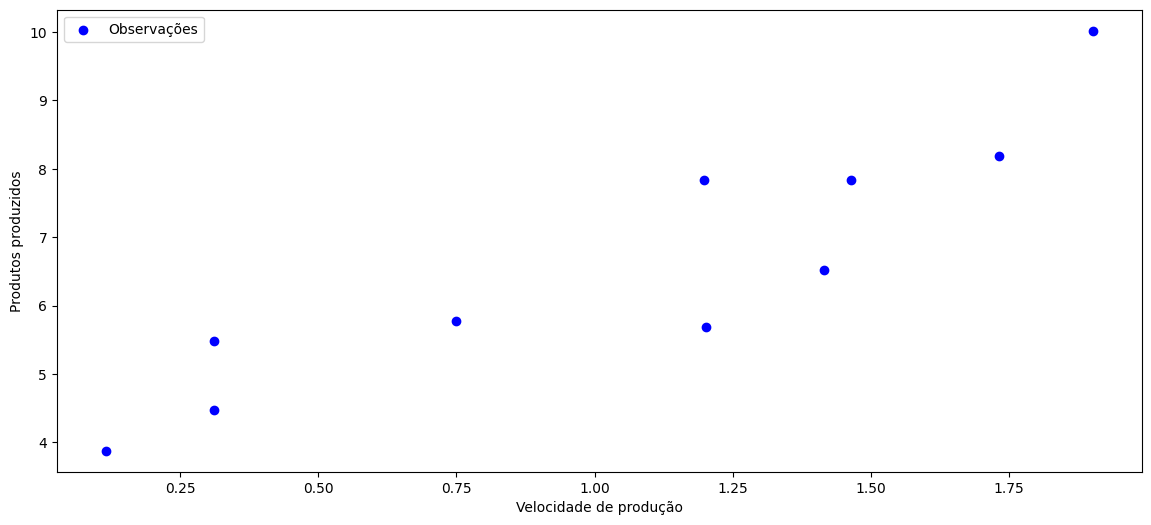

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.scatter(X,y, color='blue', label='Observações')
# Adiciona a legenda
plt.legend()
# Adiciona rótulos dos eixos
plt.xlabel("Velocidade de produção")
plt.ylabel("Produtos produzidos")
plt.show()

#### Passo 3: Testa-se um modelo

Um primeiro modelo mais intuitivo é encontrar a média dos valores e adotar esse como se fosse o modelo.

Médias dos valores de produção é 6.569503524584387


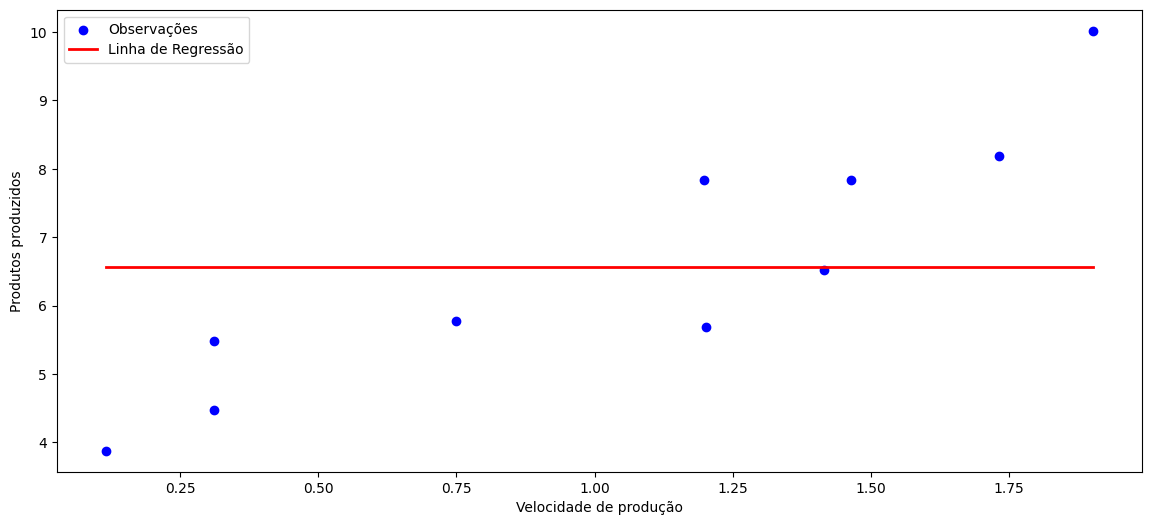

In [ ]:
# Primeiro modelo: calcula-se a média dos valores de y
y_mean = np.mean(y)
print(f"Médias dos valores de produção é {y_mean}")

# Repetindo esse valor para cada valor de X, temos um vetor com a média
# y_pred é o valor predito para os valores X, utilizando um modelo que retoran a média dos valores
y_pred = np.array([y_mean for _ in range(len(X))])

# Plotando no gráfico
fig, axs = plt.subplots(1, 1, figsize=(14, 6))
# Plota os pontos
axs.scatter(X,y, color='blue', label='Observações')
# Plota o modelo
axs.plot(X, y_pred, color='red',linewidth=2, label='Linha de Regressão')
# Adiciona a legenda
plt.legend()
# Adiciona rótulos dos eixos
plt.xlabel("Velocidade de produção")
plt.ylabel("Produtos produzidos")
plt.show()

#### Passo 4: Encontrando a soma do quadrado dos resíduos

1. Para cada ponto (azul) é verificado então sua distância ao modelo (vermelho).
2. Eleva-se ao quadrado cada uma dessas distâncias (diferenças)
3. Soma-se esses quadrado das diferenças

In [ ]:
# Distância ponto ao modelo
residuais = y_pred - y

# Residuais ao quadrado
residuais_sq = np.power(residuais, 2)

# Soma do quadrado dos resíduos
soma_residuos_sq = np.sum(residuais_sq)

print(f"Soma do quadrado dos resíduos (SSR): {soma_residuos_sq.item():.2f}")

Soma do quadrado dos resíduos (SSR): 319.06


Para ilustrar o andamento, plotam-se as linhas de diferença (laranja) entre o valor real (pontos em azul) e o valor que seria no modelo (linha em vermelho).

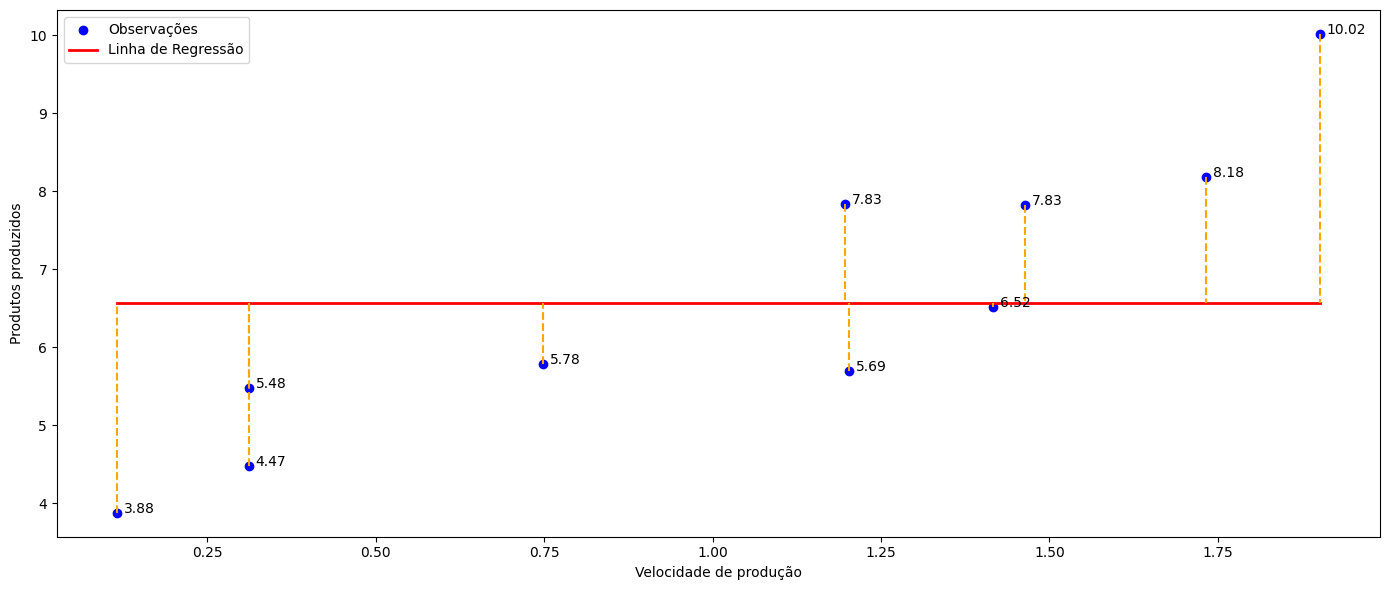

In [ ]:
# Plotando no gráfico
fig, axs = plt.subplots(1, 1, figsize=(14, 6))
# Plota os pontos
axs.scatter(X,y, color='blue', label='Observações')
# Plota o modelo
axs.plot(X, y_pred, color='red',linewidth=2, label='Linha de Regressão')

# Plota as distâncias entre pontos e modelo
for i in range(len(X)):
  # Plota as linhas das distâncias em laranja
  axs.plot([X[i], X[i]], [y[i], np.array([y_pred[i]])], color='orange', linestyle='dashed')
  # Adiociona o rótulo do valor observado
  axs.text(x= X[i]+.01, y= y[i], s=str(np.round([*y[i]][0],2)))

# Adiciona a legenda
plt.legend()
# Adiciona rótulos dos eixos
plt.xlabel("Velocidade de produção")
plt.ylabel("Produtos produzidos")
plt.tight_layout()
plt.show()

#### Passo 5: Testa-se um novo modelo (gira a reta vermelha) e e verifica-se o SSR (soma do quadrado dos resíduos).

Um novo modelo poderia ser: \
$ y = 4 + 1.5 * X $

Então aplica-se o Passo 4 novamente.

In [ ]:
# Novo modelo
y_pred = 4 + 1.5 * X

##### Repetindo o passo 4

In [ ]:
# Distância ponto ao modelo
residuais = y_pred - y

# Residuais ao quadrado
residuais_sq = np.power(residuais, 2)

# Soma do quadrado dos resíduos
soma_residuos_sq = sum(residuais_sq)

print(f"Soma do quadrado dos resíduos (SSR): {soma_residuos_sq.item():.2f}")

Soma do quadrado dos resíduos (SSR): 21.08


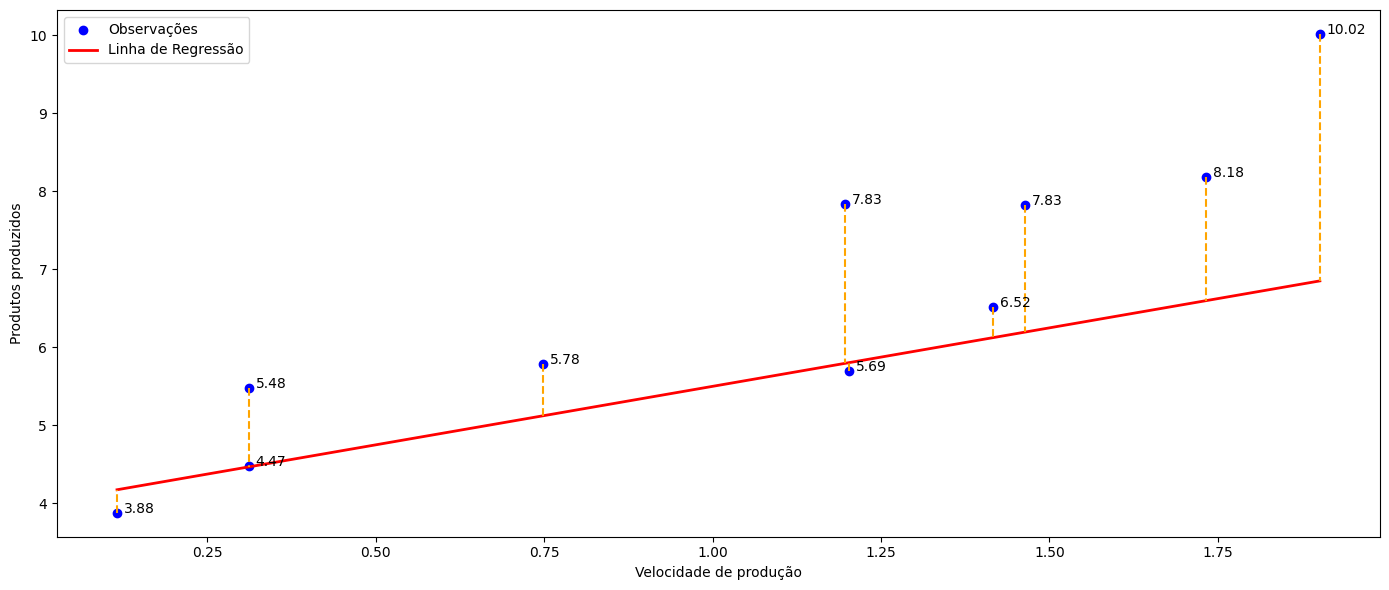

In [ ]:
# Plotando no gráfico
fig, axs = plt.subplots(1, 1, figsize=(14, 6))
# Plota os pontos
axs.scatter(X,y, color='blue', label='Observações')
# Plota o modelo
axs.plot(X, y_pred, color='red',linewidth=2, label='Linha de Regressão')

# Plota as distâncias entre pontos e modelo
for i in range(len(X)):
    # Plota as linhas das distâncias
    axs.plot([X[i], X[i]], [y[i], y_pred[i]], color='orange', linestyle='dashed')
    # Adiociona o rótulo do valor observado
    axs.text(x= X[i]+.01, y= y[i], s=str(np.round([*y[i]][0],2)))

# Adiciona a legenda
plt.legend()
# Adiciona rótulos dos eixos
plt.xlabel("Velocidade de produção")
plt.ylabel("Produtos produzidos")
plt.tight_layout()
plt.show()

Na primeira iteração foi obtido SSR de 31.91. \
Na segunda iteração foi obsido valor de SSR de 21.08, portanto o segundo modelo é melhor que o primeiro.

Esse processo de teste de modelos se repete até que se encontre o valor mínimo do SSR. E esse processo otimização que identifica o menor SSR chama-se **Método dos mínimos quadrados**

## Regressão com uso do sklearn

Aqui será abordado o emprego direto de modelos de regressão utilizando a biblioteca sklearn.

Esses modelos são de simples implementação, porém é necessario o entendimento de seu funcionamento, o ajuste de parâmetros, portanto a documentação deve ser sempre consultada.

Serão abordados os algoritmos: regressão linear, regressão ridge, árvores de decisão e redes neurais recorrentes.

### Criação do dataset para treino dos modelos

O conjunto de dados Diabetes disponível através do `load_diabetes()` do Scikit-learn é um conjunto de dados padrão, frequentemente utilizado para fins de aprendizado e demonstração em tarefas de machine learning. Ele contém informações sobre pacientes com diabetes, incluindo diversas características médicas como idade, sexo, índice de massa corporal (IMC), pressão arterial, níveis de glicose, etc.

Suas principais caractrísticas são:

- **Dados reais**: Os dados são provenientes de um estudo real sobre diabetes, o que o torna um conjunto de dados realista para testar algoritmos de aprendizado de máquina.
- **Variedade de features**: O dataset possui um número considerável de features, o que permite explorar diferentes técnicas de seleção e engenharia de features.
- **Target**: O objetivo (target) é uma medida quantitativa da progressão da doença, o que o torna um problema de regressão.


In [ ]:
# Importação da biblioteca
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Carregar um conjunto de dados de exemplo
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
# Em X ficam os dados de características que serão os preditores do progresso da doença
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# Em y, ficam os valroes de progresso da doença
y = diabetes.target

# Explicação do dataset
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
# Para ilustrar melhor cada modelo, será utilizado apenas a característica de IMC (bmi)
# Nesse caso, estará sendo utilizado os dados de IMC para treinar um modelo que,
# com base apenas no valor do IMC consiga predizer o valor da progressão da doença
col = 'bmi'

# Dividir os dados em treino (80%) e teste (20%)
# utilização do random_state para manter a reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(X[col].to_numpy(), y, test_size=0.2, random_state=42)

# Ordena os dados para facilitar a plotagem
# Coloca X_test e y_test em uma tupla e ordena pela X_test
z = sorted(zip(X_test,y_test))
# "Descompacta" a lista ordenada em X_test e y_test
X_test,y_test = zip(*z)
# Transforma a tupla de valores X-test e y_tes em um array.
X_test = np.array(X_test)
y_test = np.array(y_test)

#### Função para relatório

Para evitar repetição foi definida uma função para imprimir um relatório de performance do modelo.

O relatório consta de 2 partes: Gráfico e Métricas.

**Gráfico**:
- No eixo x tem-se os valores da característica, no caso proposto bmi ou IMC.
- No eixo y, tem-se os valores da progressão da doença.
- Os pontos pretos correspondem os dados de Teste
- A linha colorida representa o modelo ajustado aos dados de Teste

**Métricas**: Faz a comparação das métricas R², MSE e MAE de performance do modelo entre os conjuntos de Treino e Teste.

In [ ]:
def relatorio(X_test, y_test, y_train, y_pred_model, y_train_model, modelo, col, color_model):
  # Plot outputs
  plt.scatter(X_test, y_test, color="black")
  plt.plot(X_test, y_pred_model, color=color_model, linewidth=3)
  plt.xticks(())
  plt.yticks(())
  plt.title(f"{modelo} treinado com dados apenas de {col}")
  plt.xlabel(col)
  plt.ylabel("Progressão da doença")
  plt.show()

  # Avaliação das Métricas
  print(f"{modelo} - R²  - Treino {r2_score(y_train, y_train_model):.4f} - Teste {r2_score(y_test, y_pred_model):.4f}")
  print(f"{modelo} - MSE - Treino {mean_squared_error(y_train, y_train_model):.4f} - Teste {mean_squared_error(y_test, y_pred_model):.4f}")
  print(f"{modelo} - MAE - Treino {mean_absolute_error(y_train, y_train_model):.4f} - Teste {mean_absolute_error(y_test, y_pred_model):.4f}")

### Regressão Linear

Utilizando a biblioteca do sklearn, abaixo é treinado um modelo de regressão linear com base no valores de treino do IMC `X_train` e de progressão da doença `y_train`.

São obtidos os valores preditos para o `X_test` e guardado em `y_pred_lin`.

São obtidos os valores preditos para o `X_train` e guardado em `y_train_lin`.

São verificadas as métricas de R², MSE e MAE para os conjuntos de Treino e Teste.

In [ ]:
# Modelo de Regressão Linear
lin_reg = LinearRegression()
# Treino do modelo
lin_reg.fit(X_train.reshape(-1, 1), y_train)
# Valores da predição com base nos dados de Teste
y_pred_lin = lin_reg.predict(X_test.reshape(-1, 1))
# Valores da predição com base nos dados de Treino
y_train_lin = lin_reg.predict(X_train.reshape(-1, 1))

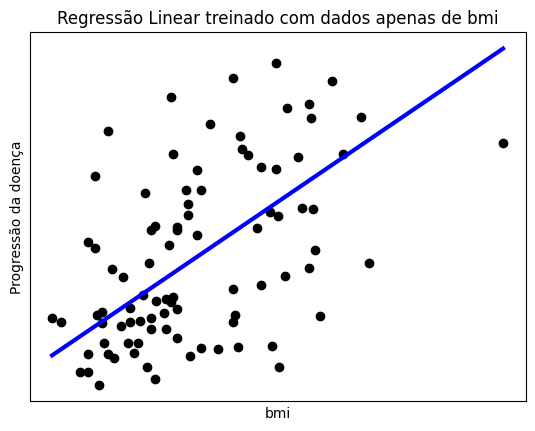

Regressão Linear - R²  - Treino 0.3657 - Teste 0.2334
Regressão Linear - MSE - Treino 3854.1127 - Teste 4061.8259
Regressão Linear - MAE - Treino 51.3797 - Teste 52.2600


In [ ]:
# Imprime o relatório do modelo
modelo = 'Regressão Linear'
color_model = 'blue'
relatorio(X_test, y_test, y_train, y_pred_lin, y_train_lin, modelo, col, color_model)

### Regressão Ridge

Utilizando a biblioteca do sklearn, abaixo é treinado um modelo de regressão ridge com base no valores de treino do IMC `X_train` e de progressão da doença `y_train`.

São obtidos os valores preditos para o `X_test` e guardado em `y_pred_ridge`.

São obtidos os valores preditos para o `X_train` e guardado em `y_train_ridge`.

São verificadas as métricas de R², MSE e MAE para os conjuntos de Treino e Teste.

In [ ]:
# Modelo de Regressão Ridge
ridge_reg = Ridge(alpha=1.0)
# Treino do modelo
ridge_reg.fit(X_train.reshape(-1, 1), y_train)
# Valores da predição com base nos dados de Teste
y_pred_ridge = ridge_reg.predict(X_test.reshape(-1, 1))
# Valores da predição com base nos dados de Treino
y_train_ridge = ridge_reg.predict(X_train.reshape(-1, 1))

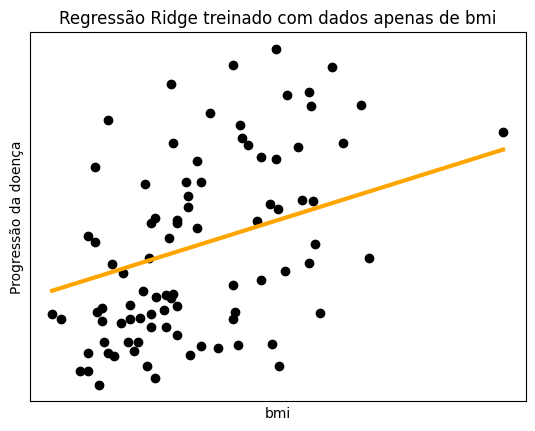

Regressão Ridge - R²  - Treino 0.2512 - Teste 0.2079
Regressão Ridge - MSE - Treino 4550.2502 - Teste 4196.6518
Regressão Ridge - MAE - Treino 57.7377 - Teste 55.9570


In [ ]:
# Imprime o relatório do modelo
modelo = 'Regressão Ridge'
color_model = 'orange'
relatorio(X_test, y_test, y_train, y_pred_ridge, y_train_ridge, modelo, col, color_model)

### Árvore de Regressão

Utilizando a biblioteca do sklearn, abaixo é treinado um modelo de regressão ridge com base no valores de treino do IMC `X_train` e de progressão da doença `y_train`.

São obtidos os valores preditos para o `X_test` e guardado em `y_pred_tree`.

São obtidos os valores preditos para o `X_train` e guardado em `y_train_tree`.

São verificadas as métricas de R², MSE e MAE para os conjuntos de Treino e Teste.

In [ ]:
# Modelo de Árvore de Regressão
tree_reg = DecisionTreeRegressor(random_state=42)
# Treino do modelo
tree_reg.fit(X_train.reshape(-1, 1), y_train)
# Valores da predição com base nos dados de Teste
y_pred_tree = tree_reg.predict(X_test.reshape(-1, 1))
# Valores da predição com base nos dados de Treino
y_train_tree = tree_reg.predict(X_train.reshape(-1, 1))

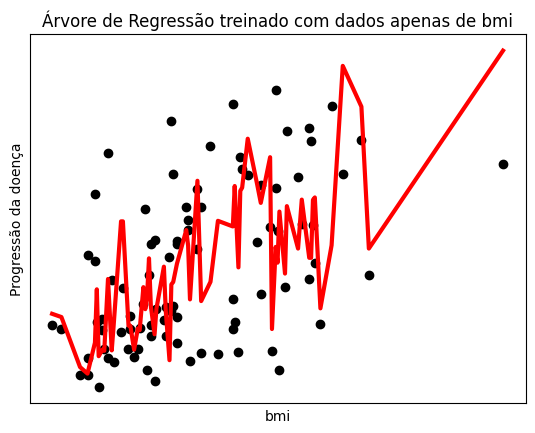

Árvore de Regressão - R²  - Treino 0.6175 - Teste 0.1560
Árvore de Regressão - MSE - Treino 2324.3150 - Teste 4471.5940
Árvore de Regressão - MAE - Treino 36.3725 - Teste 52.3906


In [ ]:
# Imprime o relatório do modelo
modelo = 'Árvore de Regressão'
color_model = 'red'
relatorio(X_test, y_test, y_train, y_pred_tree, y_train_tree, modelo, col, color_model)

### Redes Neurais Recorrentes (RNN)

Utilizando a biblioteca do sklearn, abaixo é treinado um modelo de regressão ridge com base no valores de treino do IMC `X_train` e de progressão da doença `y_train`.

A RNN necessita de uma formatação adicional nos vetores, portanto é realizado essa adaptação transformando `X_train` de dimensão (353,) em `X_train_rnn` de dimensão (353,1,1). De forma análoga é transformado `X_test` em `X_test_rnn`.

São obtidos os valores preditos para o `X_test_rnn` e guardado em `y_pred_lin`.

São obtidos os valores preditos para o `X_train_rnn` e guardado em `y_train_lin`.

In [ ]:
# Preparação dos dados para RNN
X_train_rnn = X_train.reshape((X_train.shape[0], 1, 1))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, 1))

# Cria o Modelo de RNN empilhando diversas camadas
# Esta arquitetura cria uma rede neural recorrente com duas camadas RNN,
# seguida por duas camadas densas para processamento não linear
# e uma camada de saída para a predição.
model = Sequential([
    SimpleRNN(64, activation='tanh', return_sequences=True, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    SimpleRNN(64, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Treinamento
model.fit(X_train_rnn, y_train, epochs=500, verbose=0)

# Previsões
y_pred_rnn = model.predict(X_test_rnn)
y_train_rnn = model.predict(X_train_rnn)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


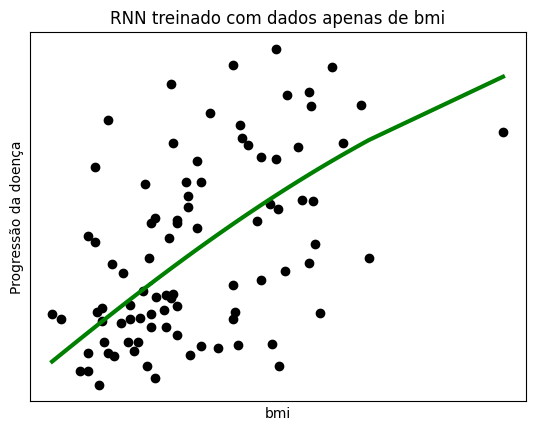

RNN - R²  - Treino 0.3608 - Teste 0.2436
RNN - MSE - Treino 3883.7364 - Teste 4007.2639
RNN - MAE - Treino 51.7536 - Teste 51.9213


In [ ]:
# Imprime o relatório do modelo
modelo = 'RNN'
color_model = 'green'
relatorio(X_test, y_test, y_train, y_pred_rnn, y_train_rnn, modelo, col, color_model)

## Conclusões

Foram testados 4 modelos distintos, sendo: Regressão Linear, Regressão Ridge, Árvore de Regressão e uma RNN.

Para cada modelo foram verificados as métricas para os conjuntos de Teste e Treino, bem como foi apresentado um gráfico do modelo ajustado ao conjunto de Teste.


### Análise Crítica dos Resultados de Desempenho

A análise dos resultados de desempenho dos modelos de regressão linear, regressão Ridge, árvore de regressão e redes neurais recorrentes (RNN) revela importantes insights sobre o comportamento de cada modelo e sua adequação ao conjunto de dados. Abaixo, são discutidos aspectos relacionados ao desempenho, possíveis problemas de overfitting e a escolha do melhor modelo a ser aplicado.


   - A **regressão linear** apresenta um desempenho modesto, com uma redução significativa do R² no conjunto de teste, indicando que o modelo tem uma capacidade limitada de generalização. A proximidade entre os erros absolutos médios (MAE) de treino e teste sugere que o modelo não está superajustado (overfitted), mas também não é suficientemente robusto para capturar toda a variabilidade dos dados.

   - A **regressão Ridge**, uma variação regularizada da regressão linear, tem um desempenho ainda mais modesto, com valores de R² mais baixos tanto para treino quanto para teste. O maior valor de MSE no treino, comparado ao MSE do teste, sugere que a regularização pode estar penalizando excessivamente os coeficientes, levando a um underfitting.

   - A **árvore de regressão** apresenta um alto R² no conjunto de treino, mas um desempenho significativamente pior no teste, com uma queda abrupta no R² e um aumento no MSE. Isso é um forte indicador de overfitting, onde o modelo se ajusta muito bem aos dados de treino, mas não generaliza bem para novos dados.
   
   - A **RNN** apresenta valores de R² e MSE próximos tanto no treino quanto no teste. Isso é um indicador de que não há overfitting. Comparando graficamente a árvore de decisão e RNN, fica claro a questão do overfitting na árvore de decisão. A RNN mostra um desempenho muito semelhante ao da regressão linear no treino porém com um custo computacional muito mais elevado. Isso decorre principalmente porque no caso apresentado, o problema com apenas uma característica (bmi), não apresenta grandes dificuldades para a Regressão Linear, a RNN provavelmente obteria melhores resultados se todas as características do dataset fossem utilizadas.


# Referências Bibliográficas
- Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly Media.
- McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. O'Reilly Media.
- Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer Series in Statistics.